<a href="https://colab.research.google.com/github/KC-Night/eda_assignment/blob/main/eda_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

In [2]:
! git clone https://github.com/KC-Night/eda_assignment

Cloning into 'eda_assignment'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (13/13), 8.13 MiB | 8.59 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

Q1:1,2,3

In [4]:
# Check repo

Q1: 4

In [5]:
# The non decreasing transformation of the median is the median of the transformed variable. In non decreasing transformations, the the order of values in the distribution are preserved. Thus, the median remains the same.
# The answer applies to any quantile. However, it doesn't apply to the IQR or the range

Q1:5

In [31]:
# No, it's not always true that m(g(X)) = g(m(X)).

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

Q2:1

In [6]:
air_df=pd.read_csv('eda_assignment/data/airbnb_hw.csv')
air_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Q2:2

In [7]:
print(air_df.shape) #30478, 13
#30478 observations
print(air_df.dtypes) #Host ID, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating, Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, Review Scores Rating

(30478, 13)
Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object


Q2:3

In [8]:
pd.crosstab(air_df['Room Type'], air_df['Property Type'])
# There are more entire homes/apartments and private rooms avaliable than shared rooms
# Houses and bed and breakfasts have more private rooms than the entire property

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


Q2:4

<Axes: >

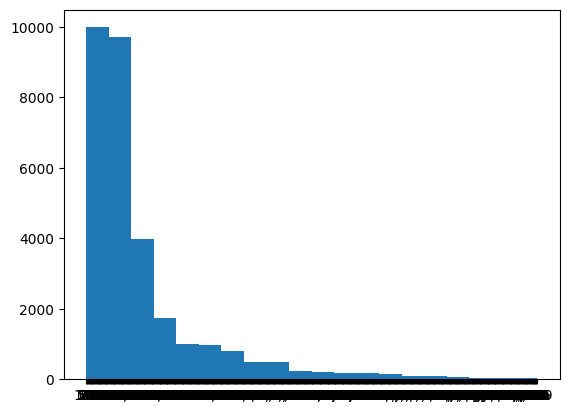

In [9]:
air_df['Price'].hist(bins=20,grid=False) #Pre transform

<Axes: ylabel='Density'>

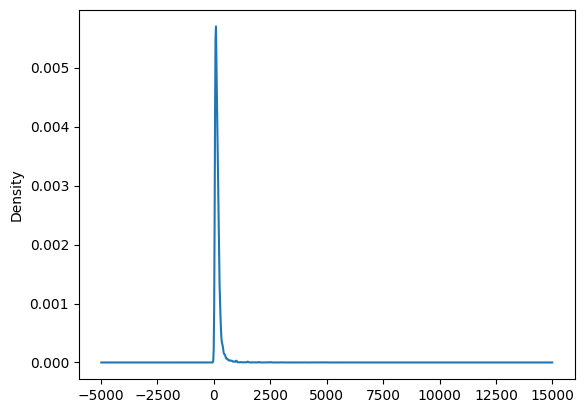

In [10]:
air_df['Price'] = air_df['Price'].astype(str).str.replace(',', '', regex=False)
air_df['Price'] = air_df['Price'].astype(float)
air_df['Price'].plot.density() #pre transform

<Axes: ylabel='Price'>

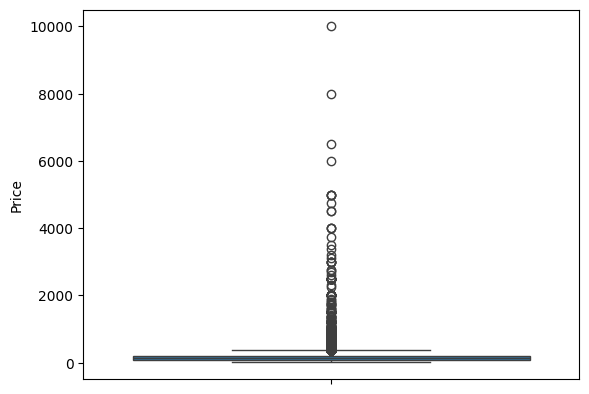

In [11]:
sns.boxplot(air_df['Price']) #pre transform

In [12]:
air_df['Price'].describe() #pre transform

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


In [13]:
# The data is really badly scaled with lots of outliers

<Axes: >

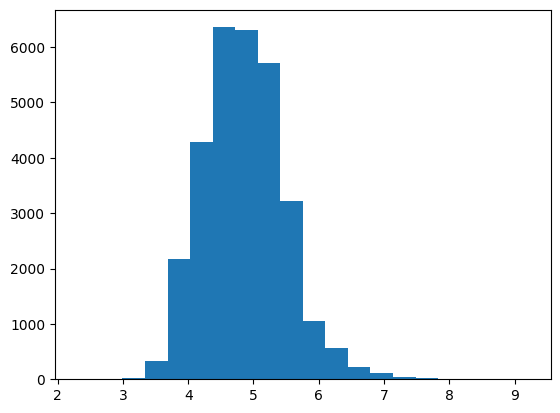

In [14]:
air_df['price_log'] = np.log(air_df['Price'])
air_df['price_log'].hist(bins=20,grid=False) #Post transform

<Axes: ylabel='Density'>

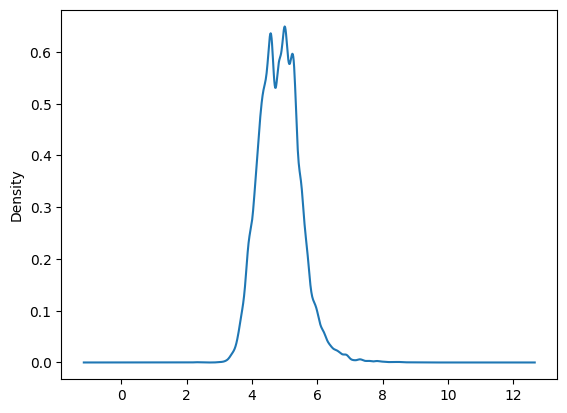

In [15]:
air_df['price_log'].plot.density() #post transform

<Axes: ylabel='price_log'>

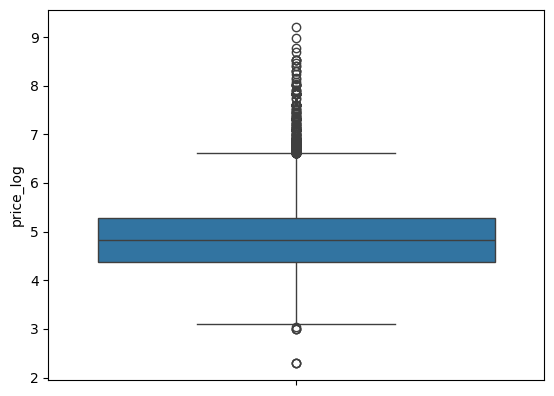

In [16]:
sns.boxplot(air_df['price_log']) #post transform

In [17]:
air_df['price_log'].describe() #post transform

,price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


Q2:5

<Axes: xlabel='Beds', ylabel='price_log'>

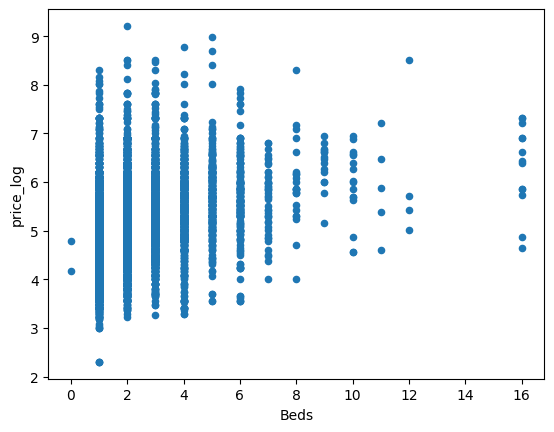

In [18]:
air_df.plot.scatter(y='price_log',x='Beds')

In [19]:
air_df.loc[:,['Beds','price_log']].groupby('Beds').describe()
# while the average is pretty similar for all number of beds, the greater the count of beds is, the standard deviation tends to be greater as well

price_log                                                              \
         count      mean       std       min       25%       50%       75%   
Beds                                                                         
0.0        2.0  4.476755  0.427613  4.174387  4.325571  4.476755  4.627939   
1.0    20344.0  4.686977  0.539666  2.302585  4.317488  4.605170  5.043425   
2.0     6610.0  5.094504  0.580425  3.218876  4.744932  5.075174  5.416100   
3.0     2071.0  5.340837  0.644742  3.258097  4.941642  5.298317  5.703782   
4.0      783.0  5.480463  0.721360  3.295837  5.010635  5.509388  5.926926   
5.0      284.0  5.669484  0.735623  3.555348  5.245705  5.669881  6.109248   
6.0      177.0  5.651790  0.824358  3.555348  5.293305  5.616771  6.052089   
7.0       45.0  5.617009  0.693481  4.007333  5.176150  5.703782  6.098074   
8.0       24.0  5.956200  0.862418  4.007333  5.495121  5.857933  6.176138   
9.0       15.0  6.341645  0.461176  5.164786  6.098011  6.476972  6.636468   
10.0      16.0  5.945514  0.762220  4.553877  5.673034  6.009872  6.559853   
11.0       5.0  5.913390  0.996967  4.605170  5.393628  5.883322  6.476972   
12.0       4.0  6.161928  1.595714  5.010635  5.314734  5.559941  6.407135   
16.0      13.0  6.312746  0.877963  4.644391  5.857933  6.437752  6.907755   

                
           max  
Beds            
0.0   4.779123  
1.0   8.294050  
2.0   9.210340  
3.0   8.517193  
4.0   8.779557  
5.0   8.987197  
6.0   7.919356  
7.0   6.802395  
8.0   8.294050  
9.0   6.956545  
10.0  6.956545  
11.0  7.207860  
12.0  8.517193  
16.0  7.313220

Q2:6

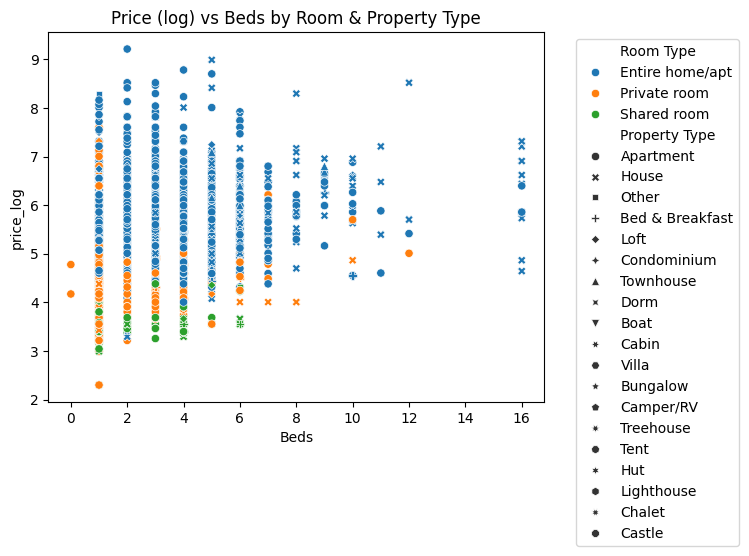

In [20]:
sns.scatterplot(
    data=air_df,
    x='Beds',
    y='price_log',
    hue='Room Type',       # color by room type
    style='Property Type'  # shape by property type
)

plt.title("Price (log) vs Beds by Room & Property Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Houses tend to have the most beds while apartments have the least
#Entire houses/apartments tend to be pricer while shared rooms are the cheapest

In [30]:
air_df.groupby(['Room Type', 'Property Type'])['Price'].describe()
# Highest Price on Average: Room type: Entire home/apartment, Property Type: Other
# Highest Standard Deviation: Room type: Entire home/apartment, Property Type: Other
# The median appears to be a more reliable estimate, because there seems to be a decent amount of outliers (see histogram, skewed right). The mean is much more sensitive to outliers, meaning the more outliers there are, the more misleading the mean is. On the other hand, the median isn't impacted by outliers, and therefore is the more reliable estimate.

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.00   39.0    39.00     39.0  
                Loft             160.00  225.0   379.00   3000.0  
                Other            140.00  300.0 

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [22]:
drill_df= pd.read_csv("eda_assignment/data/drilling_rigs.csv")
drill_df.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [23]:
print(drill_df.shape) #623 observations
print(drill_df.dtypes) #10 variables

#Some variables need to be typecast/coerced. The objects should be converted to numeric, then converted to integer

(623, 10)
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                          

In [24]:
columns_to_convert = [
    'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
    'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'
]

for col in columns_to_convert:
    drill_df[col] = pd.to_numeric(drill_df[col], errors='coerce')

drill_df[columns_to_convert] = drill_df[columns_to_convert].astype('Int64')

print(drill_df.dtypes)

Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                      Int64
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                    Int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)      Int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)     Int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)        Int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                                    

Q3:2

In [25]:
drill_df['time'] = pd.to_datetime(drill_df['Month'], format='mixed')
print(drill_df['time'])

0     1973-01-01
1     1973-02-01
2     1973-03-01
3     1973-04-01
4     1973-05-01
         ...    
618   2024-07-01
619   2024-08-01
620   2024-09-01
621   2024-10-01
622   2024-11-01
Name: time, Length: 623, dtype: datetime64[ns]


Q3:3

Text(0.5, 1.0, 'Active Well Service Rig Count (Number of Rigs) Over Time')

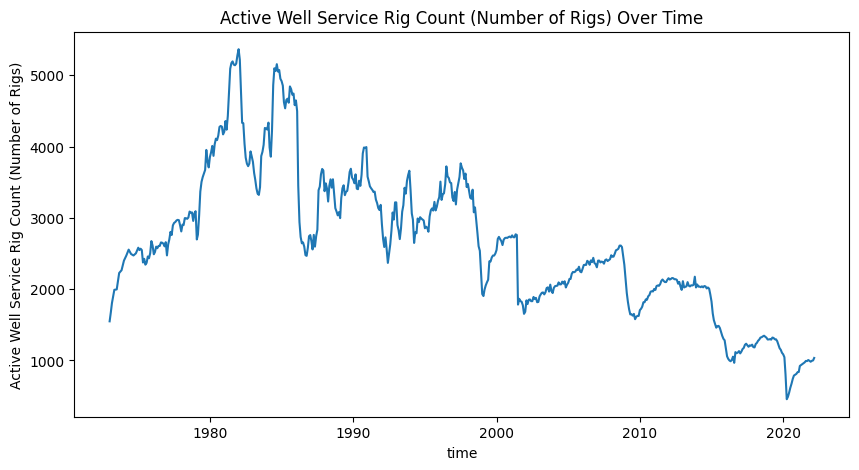

In [26]:
drill_df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(drill_df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')
drill_df.dropna(subset=['Active Well Service Rig Count (Number of Rigs)'], inplace=True)
drill_df['RigCount_log'] = np.log(drill_df['Active Well Service Rig Count (Number of Rigs)'])

plt.figure(figsize=(10,5))
sns.lineplot(
    data=drill_df,
    x='time',
    y='Active Well Service Rig Count (Number of Rigs)'
)
plt.title("Active Well Service Rig Count (Number of Rigs) Over Time")
# As the months become more recent, the amount active well service rigs generally start decreasing. They also spike up for short periods of time, most likely to do with rising and falling gas/oil prices

Q3:4

Text(0, 0.5, 'Change in Rig Count')

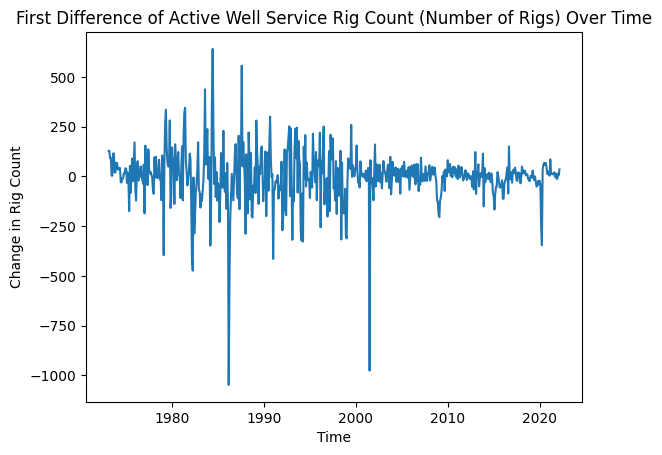

In [27]:
rigs = drill_df.sort_values('time')
y = rigs['Active Well Service Rig Count (Number of Rigs)'].to_numpy()
t = len(y)
diff = y[1:] - y[:(t-1)]
dates = rigs['time'].to_numpy()[1:]

sns.lineplot(x=rigs['time'][1:],y=diff)
plt.title("First Difference of Active Well Service Rig Count (Number of Rigs) Over Time")
plt.xlabel("Time")
plt.ylabel("Change in Rig Count")

# The change in rig count constantly spikes above and below zero, showing increases and decreases in rig counts over time (again, most likely following the trend of gas/oil prices)

Q3:5

In [28]:
drill_melt=drill_df.melt(id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',	'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'])
print(drill_melt)

           time                                           variable  value
0    1973-01-01  Crude Oil and Natural Gas Rotary Rigs in Opera...   1120
1    1973-02-01  Crude Oil and Natural Gas Rotary Rigs in Opera...   1037
2    1973-03-01  Crude Oil and Natural Gas Rotary Rigs in Opera...    959
3    1973-04-01  Crude Oil and Natural Gas Rotary Rigs in Opera...    914
4    1973-05-01  Crude Oil and Natural Gas Rotary Rigs in Opera...    974
...         ...                                                ...    ...
1177 2021-11-01  Crude Oil and Natural Gas Rotary Rigs in Opera...     15
1178 2021-12-01  Crude Oil and Natural Gas Rotary Rigs in Opera...     14
1179 2022-01-01  Crude Oil and Natural Gas Rotary Rigs in Opera...     18
1180 2022-02-01  Crude Oil and Natural Gas Rotary Rigs in Opera...     14
1181 2022-03-01  Crude Oil and Natural Gas Rotary Rigs in Opera...     12

[1182 rows x 3 columns]


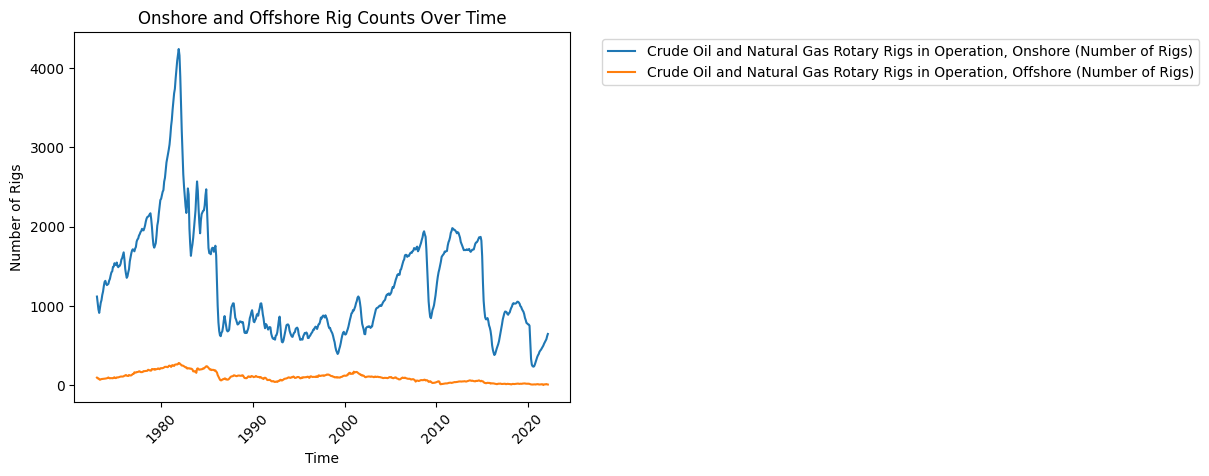

In [29]:
sns.lineplot(data=drill_melt,x='time',y='value',hue='variable')
plt.title("Onshore and Offshore Rig Counts Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')